In [1]:
import os,sys
sys.path.insert(0, os.path.abspath(os.getcwd() + "/../build/python/"))
import pyqedfv as qedfv
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tnrange, tqdm

In [2]:
# from spherical to Cartesian coordinates
def toCartesian(v):
    x = v[0] * np.sin(v[1]) * np.cos(v[2])
    y = v[0] * np.sin(v[1]) * np.sin(v[2])
    z = v[0] * np.cos(v[1])
    return np.array([x, y, z])

def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

In [3]:
cqedr = qedfv.Coef(qed=qedfv.Qed.r)

{ eta: 0.833333, nmax: 55 }


  0%|          | 0/10000 [00:00<?, ?it/s]

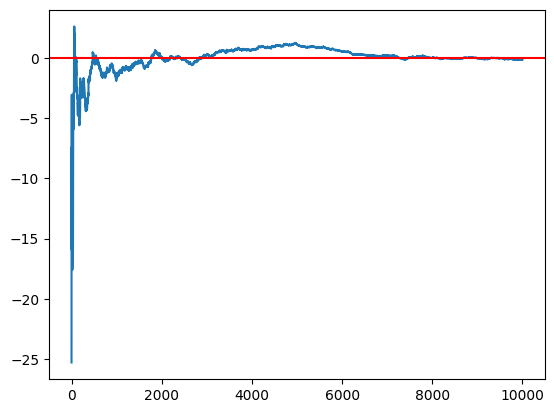

In [4]:
vnorm = 0.994
j = 0.
npoints = 10000
par = cqedr.tune(j, np.array([vnorm, 0., 0.]), residual=1.e-4)
print(par)
pts = sample_spherical(npoints)
av = np.zeros(npoints)
sum = 0.
for i in tnrange(npoints):
    sum += cqedr(j, vnorm*pts[:, i], par)
    av[i] = sum/(i+1)
plt.plot(av)
plt.axhline(y = cqedr(j, par)*np.arctanh(vnorm)/vnorm, color = 'r', linestyle = '-')
plt.show()